# Food Guide to Lincoln

### Step 1: Prepare environment

In [4]:
#Import libraries

import pandas as pd

import numpy as np

import geopy
from geopy.geocoders import Nominatim

import requests

import random

from pandas.io.json import json_normalize

import folium

import seaborn as sns

from matplotlib import pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

from IPython.display import Image 
from IPython.core.display import HTML 

In [21]:
#Define Foursquare credentials

CLIENT_ID = '' 
CLIENT_SECRET = '' 
VERSION = '20181018'
LIMIT=200 
radius=8000 #within a 5-mile radius 

#Define latitude and longitude of the University of Nebraska-Lincoln (UNL) as central point in Lincoln

#Lincoln
#latitude = 40.806862
#longitude = -96.681679

#UNL
latitude = 40.820744
longitude = -96.700470

### Step 2: Search top picks via Foursquare API

In [24]:
#Search for 'Top Picks' around UNL

search_query = 'Top Picks'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=DZ04RCX1KJHCJWWF1GCAVOZANVLSJFRWSGP0JTAPELFCQAWD&client_secret=P3HNAWZV3DBOJ5CIMXEUK14RD2EC3LCMRJP3WIEQM2PUX0E3&ll=40.820744,-96.70047&v=20181018&query=Top Picks&radius=8000&limit=200'

In [25]:
#Send GET request

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e820dee69babe001b203610'},
 'response': {'venues': [{'id': '5deaa351ecb0ba0008fffe2f',
    'name': 'Top Picks',
    'location': {'lat': 40.75501074272857,
     'lng': -96.69976115226746,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.75501074272857,
       'lng': -96.69976115226746}],
     'distance': 7317,
     'postalCode': '68512',
     'cc': 'US',
     'city': 'Lincoln',
     'state': 'NE',
     'country': 'United States',
     'formattedAddress': ['Lincoln, NE 68512', 'United States']},
    'categories': [{'id': '4f2a210c4b9023bd5841ed28',
      'name': 'Housing Development',
      'pluralName': 'Housing Developments',
      'shortName': 'Housing Development',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/housingdevelopment_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1585581630',
    'hasPerk': False},
   {'id': '4d56eeeea747b60c80032f2b',
    'name': 'Top Of The Capital

In [26]:
#Convert to data frame

#assign relevant part of JSON to venues
venues = results['response']['venues']

#tranform venues into a data frame
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4f2a210c4b9023bd5841ed28', 'name': 'H...",NaN,NaN,NaN,NaN,NaN,NaN,False,5deaa351ecb0ba0008fffe2f,NaN,...,NaN,7317,"[Lincoln, NE 68512, United States]","[{'label': 'display', 'lat': 40.75501074272857...",40.755011,-96.699761,68512,NE,Top Picks,v-1585581630
1,"[{'id': '4bf58dd8d48988d12a941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4d56eeeea747b60c80032f2b,1445 K St,...,at 13th & M St,1002,"[1445 K St (at 13th & M St), NE 68508, United ...","[{'label': 'display', 'lat': 40.81186925640689...",40.811869,-96.702493,68508,Nebraska,Top Of The Capital,v-1585581630
2,"[{'id': '4eb1baf03b7b2c5b1d4306ca', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,4edf8b085c5cced9794d3a9d,NaN,...,NaN,402,"[Lincoln, NE 68508, United States]","[{'label': 'display', 'lat': 40.81712980648517...",40.817130,-96.700456,68508,NE,Kuhns Top,v-1585581630
3,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",NaN,NaN,NaN,NaN,NaN,NaN,False,5c4e29e689e490002c0a1342,141 N 9th St,...,NaN,963,"[141 N 9th St, Lincoln, NE 68508, United States]","[{'label': 'display', 'lat': 40.81517667, 'lng...",40.815177,-96.709222,68508,NE,Top Golf Swing Suite,v-1585581630
4,"[{'id': '4bf58dd8d48988d119951735', 'name': 'W...",NaN,NaN,NaN,NaN,NaN,NaN,False,4ffde0dde4b0319bcd01bca3,1036 O St,...,NaN,909,"[1036 O St, Lincoln, NE 68508, United States]","[{'label': 'display', 'lat': 40.81367686800858...",40.813677,-96.705889,68508,NE,Top Shelf Beverage Services,v-1585581630


In [27]:
#Clean data frame

#keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

#function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

#clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Top Picks,Housing Development,NaN,US,Lincoln,United States,NaN,7317,"[Lincoln, NE 68512, United States]","[{'label': 'display', 'lat': 40.75501074272857...",40.755011,-96.699761,68512,NE,5deaa351ecb0ba0008fffe2f
1,Top Of The Capital,Capitol Building,1445 K St,US,NaN,United States,at 13th & M St,1002,"[1445 K St (at 13th & M St), NE 68508, United ...","[{'label': 'display', 'lat': 40.81186925640689...",40.811869,-96.702493,68508,Nebraska,4d56eeeea747b60c80032f2b
2,Kuhns Top,Stables,NaN,US,Lincoln,United States,NaN,402,"[Lincoln, NE 68508, United States]","[{'label': 'display', 'lat': 40.81712980648517...",40.817130,-96.700456,68508,NE,4edf8b085c5cced9794d3a9d
3,Top Golf Swing Suite,Hotel,141 N 9th St,US,Lincoln,United States,NaN,963,"[141 N 9th St, Lincoln, NE 68508, United States]","[{'label': 'display', 'lat': 40.81517667, 'lng...",40.815177,-96.709222,68508,NE,5c4e29e689e490002c0a1342
4,Top Shelf Beverage Services,Wine Shop,1036 O St,US,Lincoln,United States,NaN,909,"[1036 O St, Lincoln, NE 68508, United States]","[{'label': 'display', 'lat': 40.81367686800858...",40.813677,-96.705889,68508,NE,4ffde0dde4b0319bcd01bca3
5,Topeka,None,NaN,US,Lincoln,United States,NaN,478,"[Lincoln, NE 68508, United States]","[{'label': 'display', 'lat': 40.818023, 'lng':...",40.818023,-96.696074,68508,NE,4f739a51e4b0ee7d47864e4f
6,The Top Hat,Bar,736 W Cornhusker Hwy,US,Lincoln,United States,NaN,3184,"[736 W Cornhusker Hwy, Lincoln, NE 68521, Unit...","[{'label': 'display', 'lat': 40.83584600000000...",40.835846,-96.732574,68521,NE,4beb691f62c0c928d432e2d4
7,Centerstone Condos Roof Top Deck,Garden,100 N 12th St,US,Lincoln,United States,o,788,"[100 N 12th St (o), Lincoln, NE 68508, United ...","[{'label': 'display', 'lat': 40.81411124, 'lng...",40.814111,-96.703763,68508,NE,4d9cfa977509b1f71e0d37a0
8,Big Top Performance Art Center,Gym / Fitness Center,1920 Holdrege St,US,Lincoln,United States,NaN,1074,"[1920 Holdrege St, Lincoln, NE 68503, United S...","[{'label': 'display', 'lat': 40.828516, 'lng':...",40.828516,-96.692913,68503,NE,5ba2af145f68b9002c23a87f
9,Toppers Pizza,Pizza Place,"1226 P St,",US,Lincoln,United States,st No P St,689,"[1226 P St, (st No P St), Lincoln, NE 68508, U...","[{'label': 'display', 'lat': 40.814902, 'lng':...",40.814902,-96.703181,68508,NE,4ef23d4b0e015e413acf74a6


In [71]:
#Obtain shape of data frame

dataframe_filtered.shape

(49, 15)

### Step 3: Visualize top picks on map centered around UNL

In [33]:
#Visualize top picks on map

#generate map centred around UNL
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

#add a red circle marker to represent UNL
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='University of Nebraska-Lincoln',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

#add top picks as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

#display map
venues_map

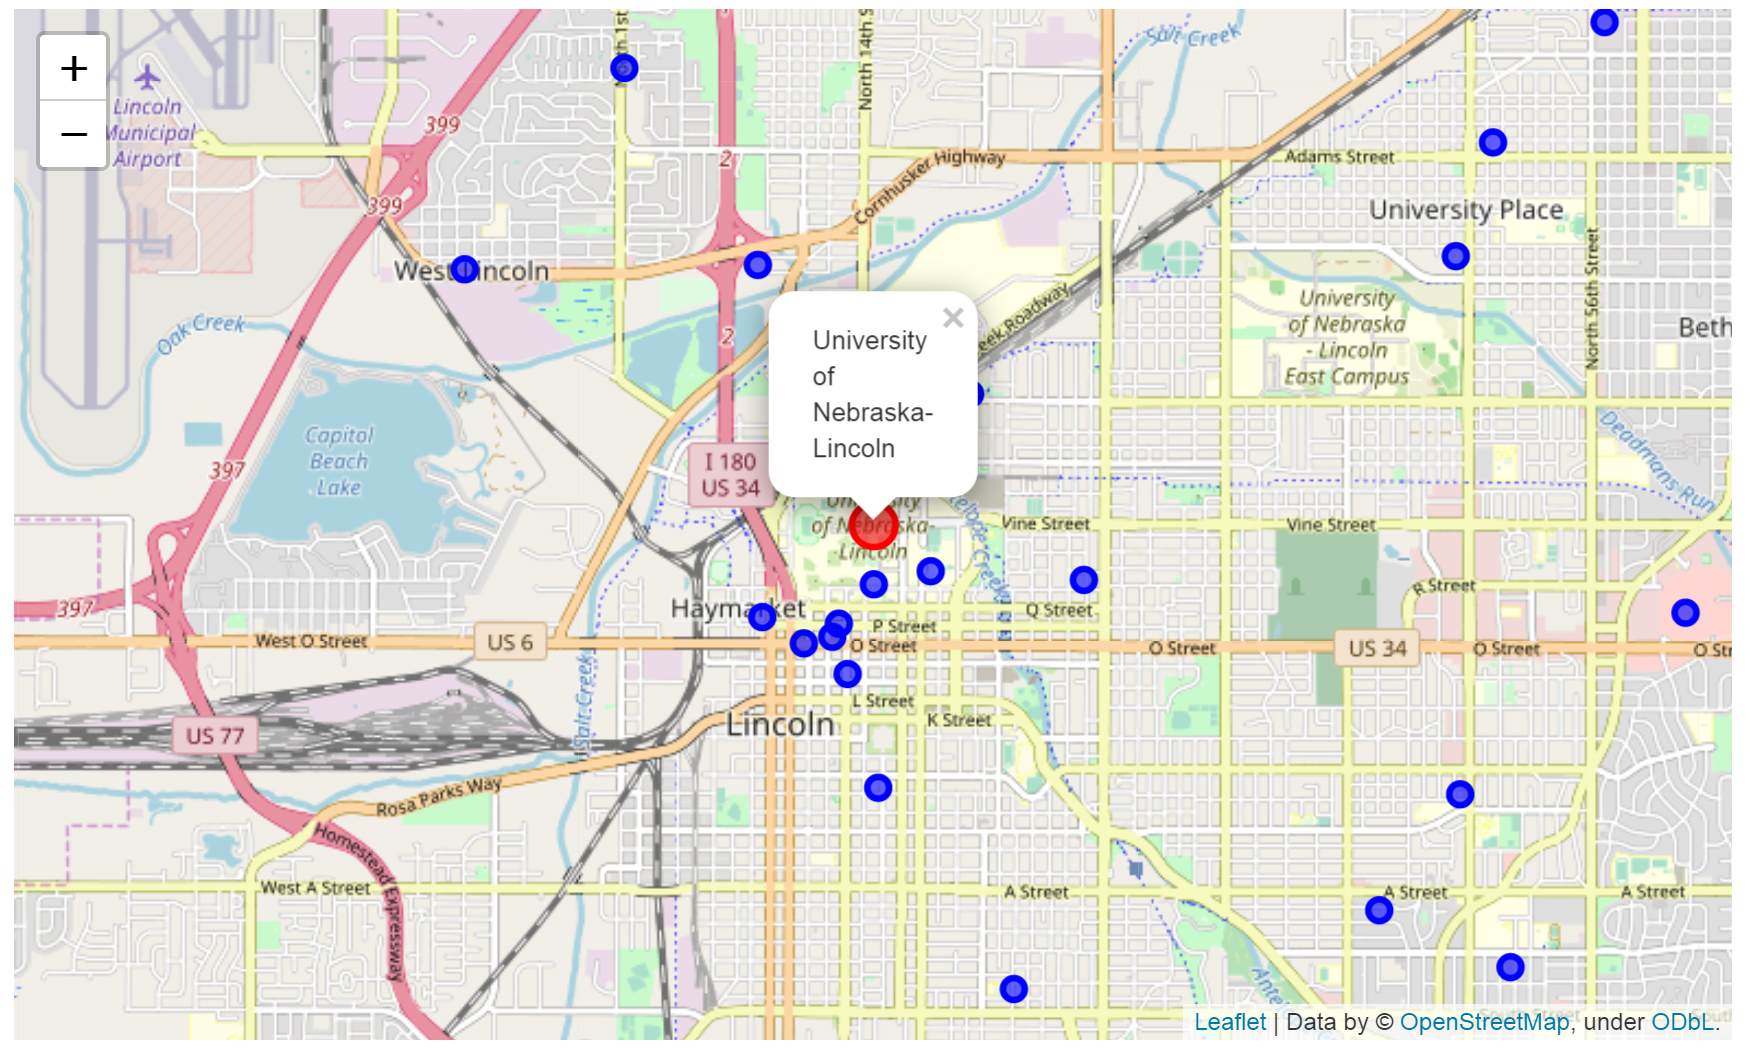

In [34]:
#Display static map image

path="Downloads/"

Image(filename=path+"Top Picks around UNL Map.png")

### Step 4: Obtain food- and drink-related top picks

In [40]:
#Explore categories among top picks

dataframe_filtered.categories.unique()

array(['Housing Development', 'Capitol Building', 'Stables', 'Hotel',
       'Wine Shop', None, 'Bar', 'Garden', 'Gym / Fitness Center',
       'Pizza Place', 'Residential Building (Apartment / Condo)',
       'Speakeasy', 'Clothing Store', 'Automotive Shop', 'Food',
       'Salon / Barbershop', 'Diner', 'Advertising Agency', "Men's Store",
       'Home Service', 'Ice Cream Shop', 'Miscellaneous Shop',
       'Construction & Landscaping', 'Beer Garden', 'Road', 'Rest Area',
       'Frozen Yogurt Shop'], dtype=object)

In [62]:
#Subset data frame for necessary variables

df = dataframe_filtered.loc[:, ['name', 'categories', 'distance', 'lat', 'lng']]
df.head()

,name,categories,distance,lat,lng
0,Top Picks,Housing Development,7317,40.755011,-96.699761
1,Top Of The Capital,Capitol Building,1002,40.811869,-96.702493
2,Kuhns Top,Stables,402,40.817130,-96.700456
3,Top Golf Swing Suite,Hotel,963,40.815177,-96.709222
4,Top Shelf Beverage Services,Wine Shop,909,40.813677,-96.705889


In [63]:
bar = df[df.categories == 'Bar']
bar

,name,categories,distance,lat,lng
6,The Top Hat,Bar,3184,40.835846,-96.732574


In [64]:
pizza = df[df.categories == 'Pizza Place']
pizza

,name,categories,distance,lat,lng
9,Toppers Pizza,Pizza Place,689,40.814902,-96.703181


In [65]:
speakeasy = df[df.categories == 'Speakeasy']
speakeasy

,name,categories,distance,lat,lng
11,zee bungalow,Speakeasy,1433,40.817471,-96.684012


In [66]:
food = df[df.categories == 'Food']
food

,name,categories,distance,lat,lng
18,Scooter's Coffee House/Cherry On Top,Food,4027,40.854001,-96.681648


In [67]:
diner = df[df.categories == 'Diner']
diner

,name,categories,distance,lat,lng
22,Roof Top Diners,Diner,4814,40.843428,-96.651804


In [68]:
ic = df[df.categories == 'Ice Cream Shop']
ic

,name,categories,distance,lat,lng
26,Topper Popper,Ice Cream Shop,5962,40.827130,-96.630194
40,Cherry On Top,Ice Cream Shop,7253,40.757274,-96.681013


In [69]:
beer = df[df.categories == 'Beer Garden']
beer

,name,categories,distance,lat,lng
41,Nebraska Top Hop Competition,Beer Garden,8557,40.88552,-96.645732


In [70]:
froyo = df[df.categories == 'Frozen Yogurt Shop']
froyo

,name,categories,distance,lat,lng
48,Cherry On Top,Frozen Yogurt Shop,9212,40.73955,-96.679302
